# Visualization using basic APIs of Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Global API
*Matplotlib's Default pyplot API has a global, MATLAB-style interface*

In [2]:
x = np.arange(-10,11)

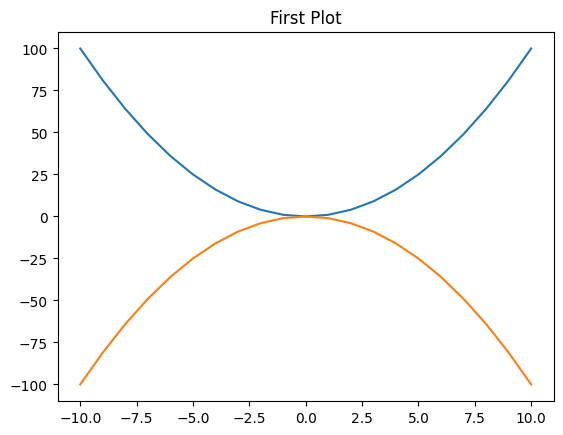

In [3]:
plt.Figure(figsize=(10,5))
plt.title('First Plot')
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

Text(0, 0.5, '-X Squared')

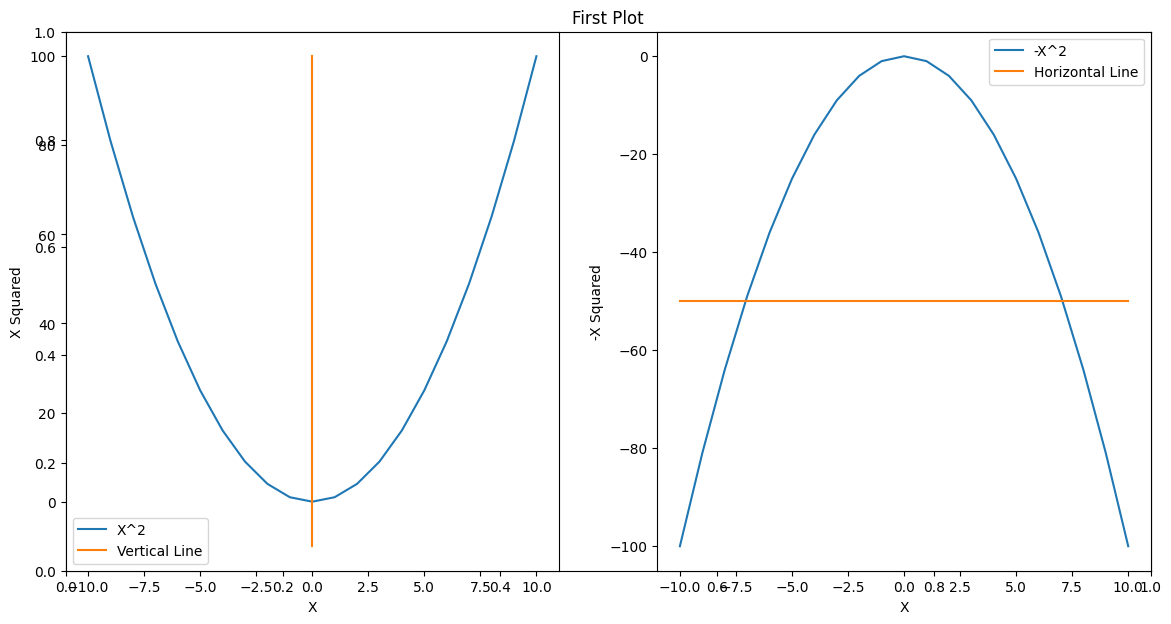

In [4]:
plt.figure(figsize=(14,7))
plt.title('First Plot')
plt.subplot(1,2,1) # 1 row, 2 columns, 1st plot
plt.plot(x, x**2)
plt.plot([0,0,0],[-10,0,100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
plt.plot(x, -1*(x**2))
plt.plot([-10,0,10],[-50,-50,-50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('-X Squared')

## OOP Interface

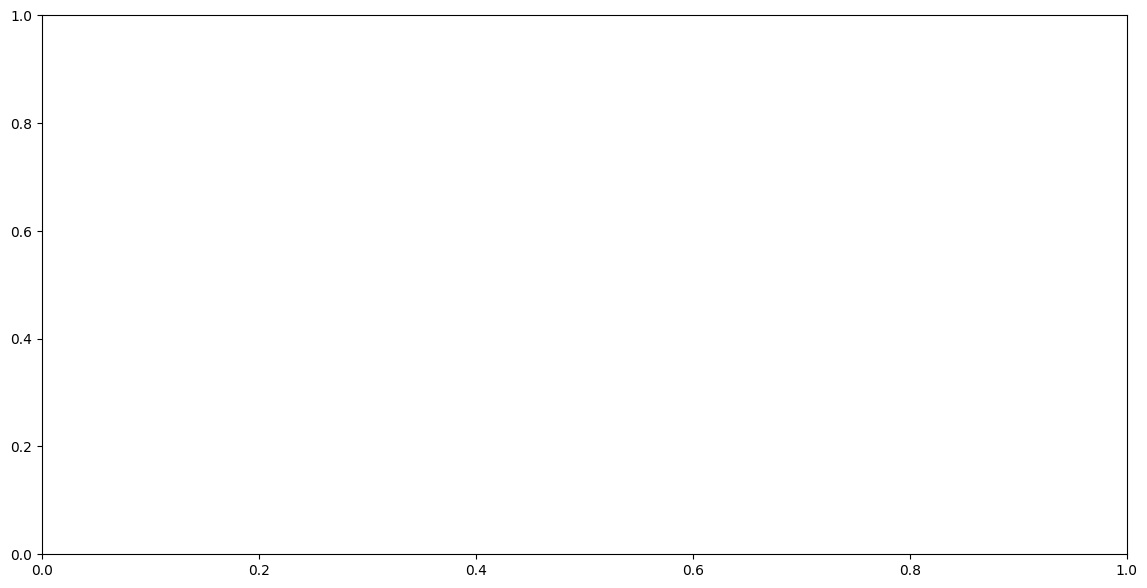

In [5]:
fig,axes = plt.subplots(figsize=(14,7))

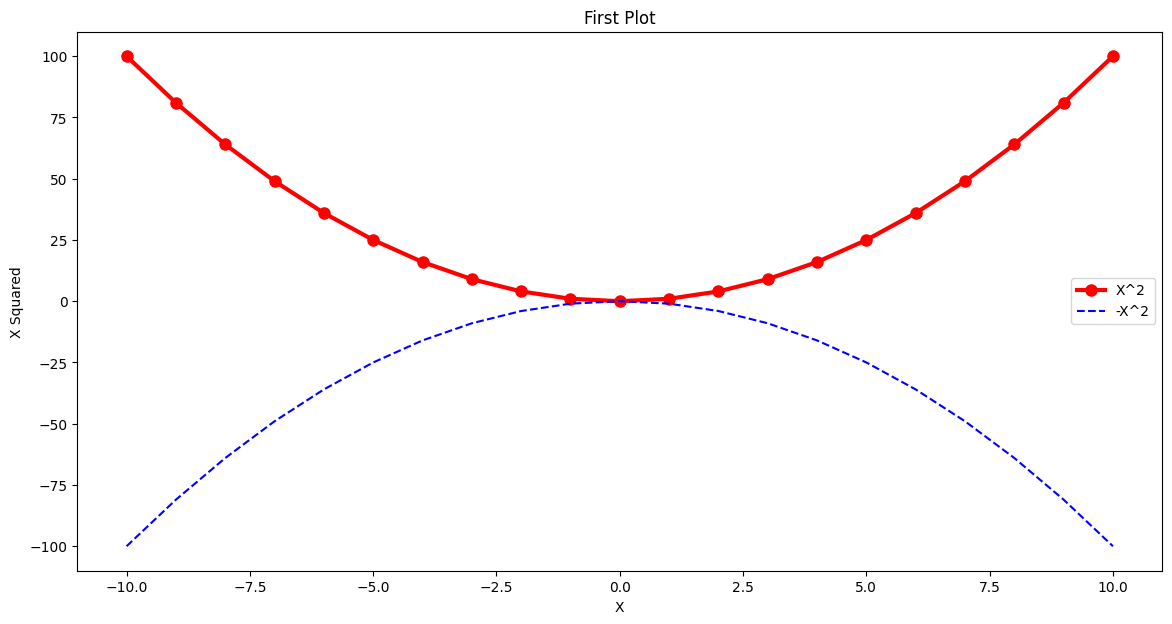

In [6]:
axes.plot(
    x,(x ** 2),color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')
axes.plot(x, -1 * (x ** 2),'b--', label='-X^2')
axes.set_xlabel('X')
axes.set_ylabel('X Squared')
axes.set_title('First Plot')
axes.legend()
fig


Text(0.5, 1.0, 'Different Line Styles')

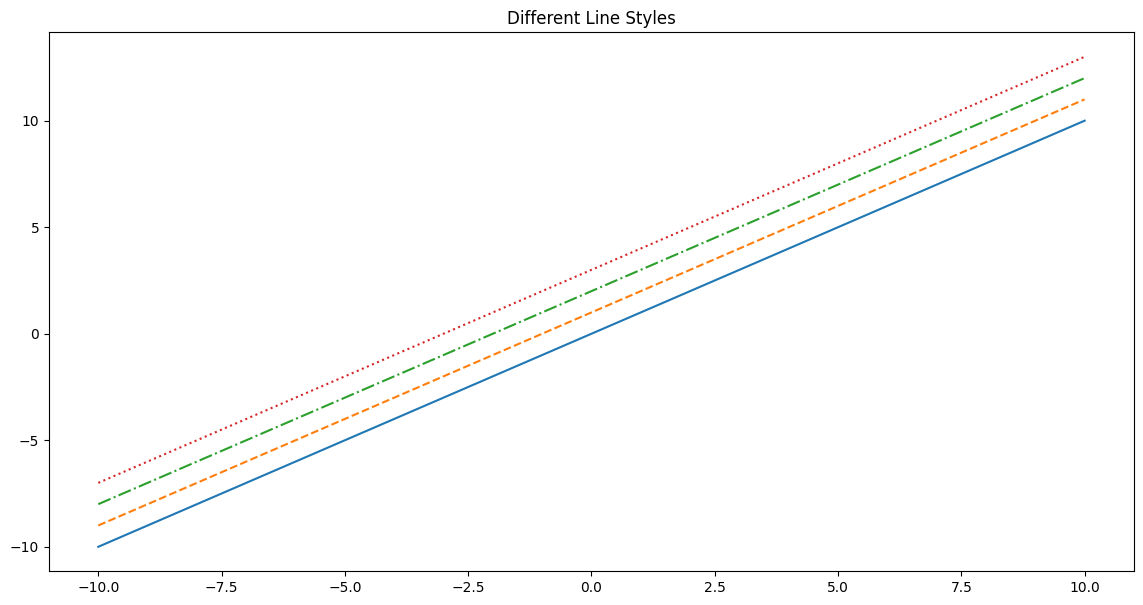

In [7]:
fig,axes = plt.subplots(figsize=(14,7))
axes.plot(x,x+0,linestyle='solid')
axes.plot(x,x+1,linestyle='dashed')
axes.plot(x,x+2,linestyle='dashdot')
axes.plot(x,x+3,linestyle='dotted')
axes.set_title('Different Line Styles')

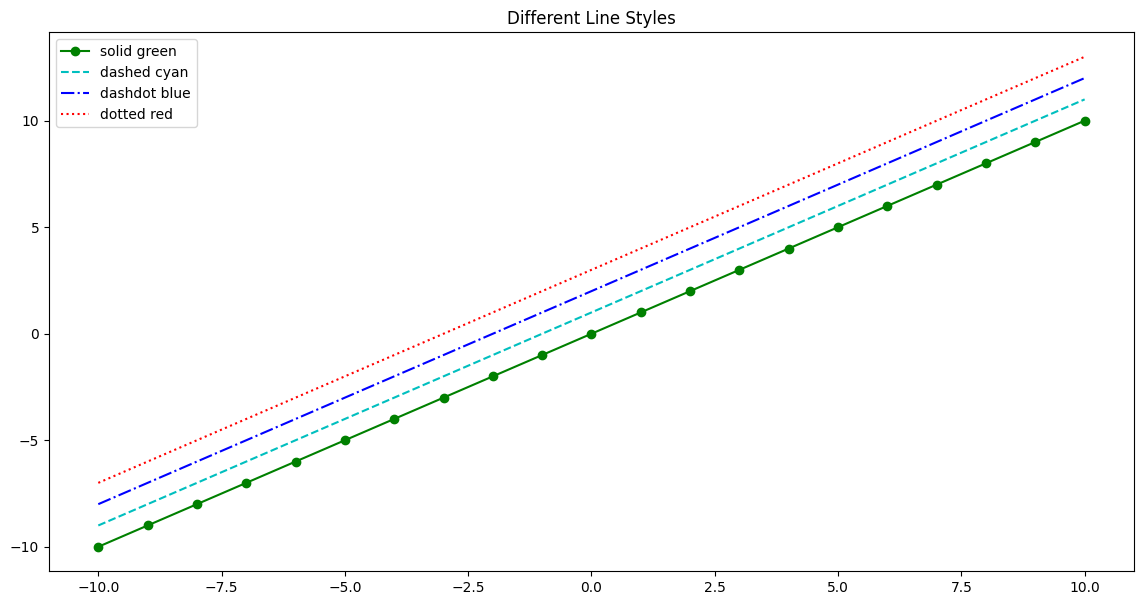

In [8]:
fig,axes = plt.subplots(figsize=(14,7))

axes.plot(x,x+0,'-og',label='solid green')
axes.plot(x,x+1,'--c',label='dashed cyan')
axes.plot(x,x+2,'-.b',label='dashdot blue')
axes.plot(x,x+3,':r',label='dotted red')
axes.set_title('Different Line Styles')
axes.legend()

In [9]:
print('Markers: ({})'.format([m for m in plt.Line2D.markers]))

Markers: (['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', ''])


In [10]:
linestyles = ['-', '--', '-.', ':']
print('Line Styles: ({})'.format(linestyles))

Line Styles: (['-', '--', '-.', ':'])


## Other types of plot

*Figures and subFigures*

(<Figure size 640x480 with 1 Axes>, <Axes: >)

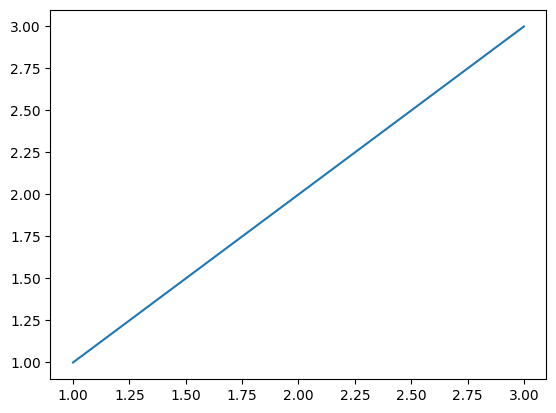

In [11]:
plot_objects = plt.subplots()
fig,ax = plot_objects
ax.plot([1,2,3],[1,2,3])
plot_objects

(<Figure size 1400x700 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

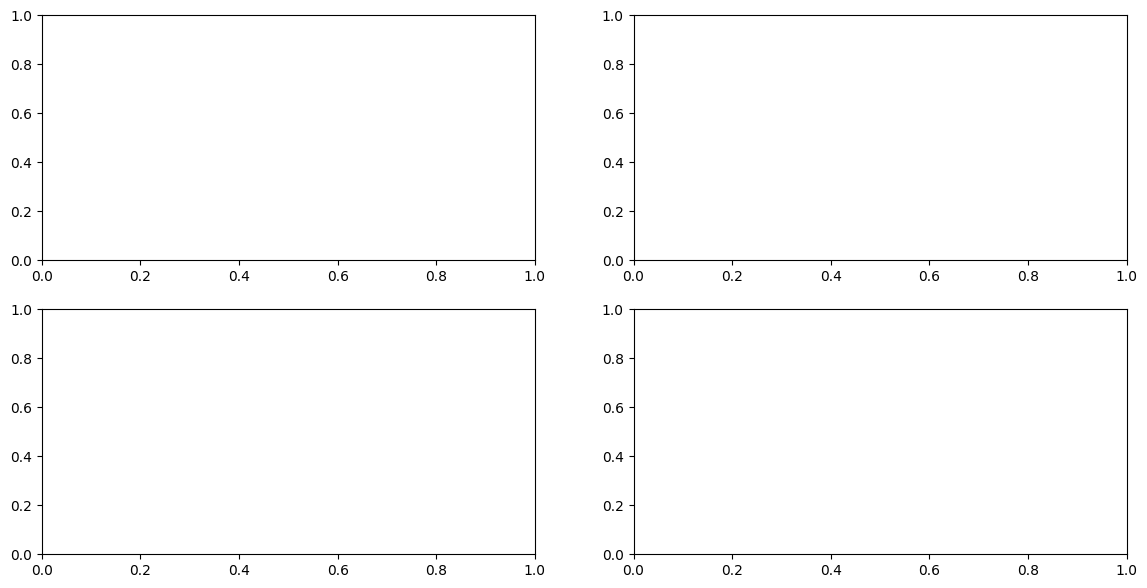

In [12]:
plot_objects = plt.subplots(nrows=2,ncols=2,figsize=(14,7))
fig,((ax1,ax2),(ax3,ax4)) = plot_objects
plot_objects

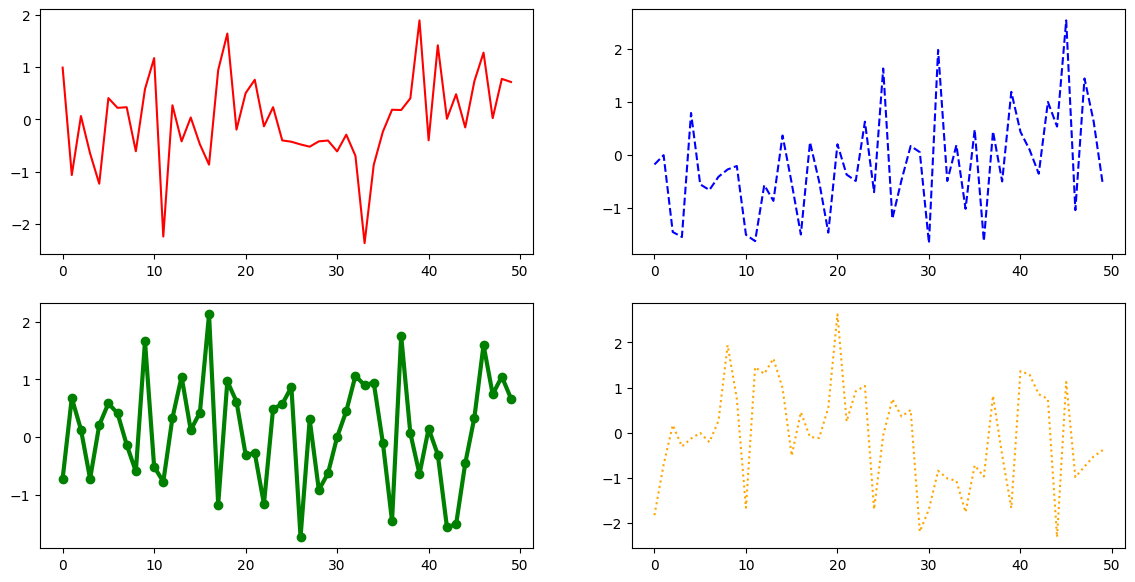

In [13]:
ax1.plot(np.random.randn(50),c='red',linestyle='-')
ax2.plot(np.random.randn(50),c='blue',linestyle='--')
ax3.plot(np.random.randn(50),c='green',marker='o',linewidth=3.0)
ax4.plot(np.random.randn(50),c='orange',linestyle=':')

fig

## The Subplot2grid command

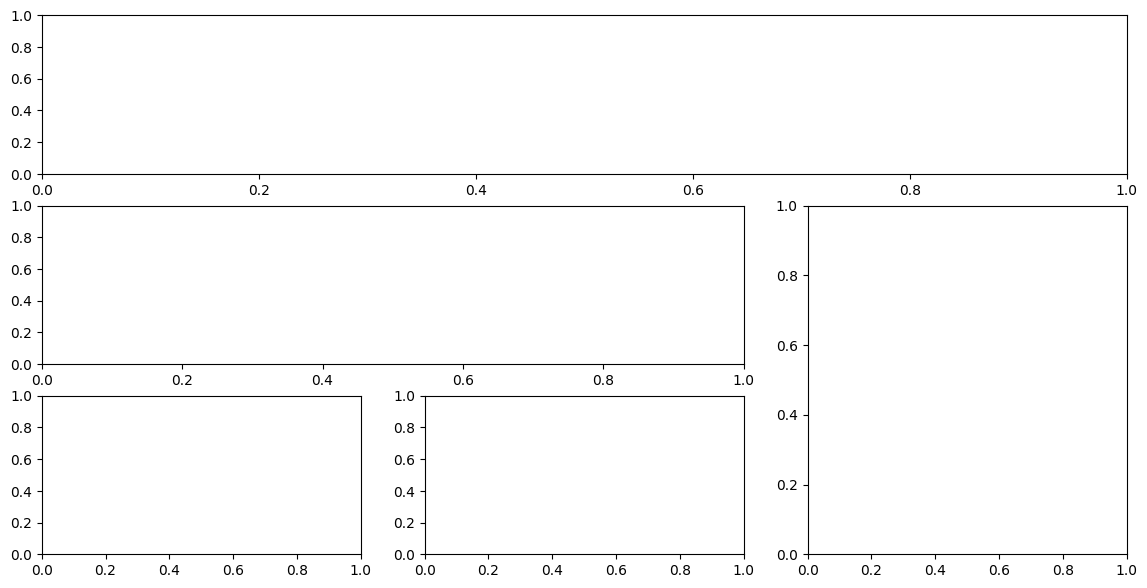

In [14]:
plt.figure(figsize=(14,7))
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2)
ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2)
ax4 = plt.subplot2grid((3,3),(2,0))
ax5 = plt.subplot2grid((3,3),(2,1))

## Scatter plot

In [15]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 # 0 to 15 point radii

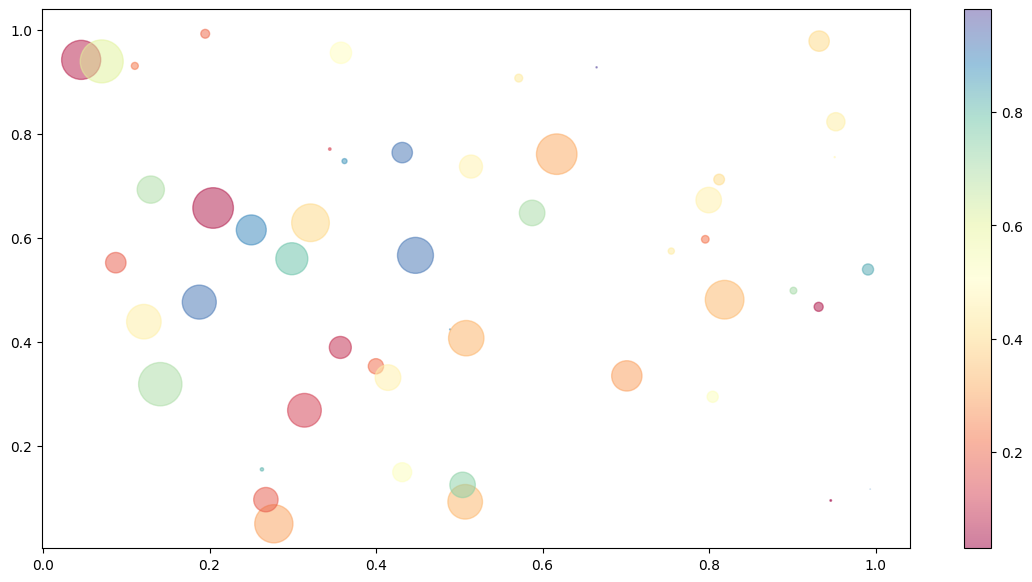

In [16]:
plt.figure(figsize=(14,7))
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

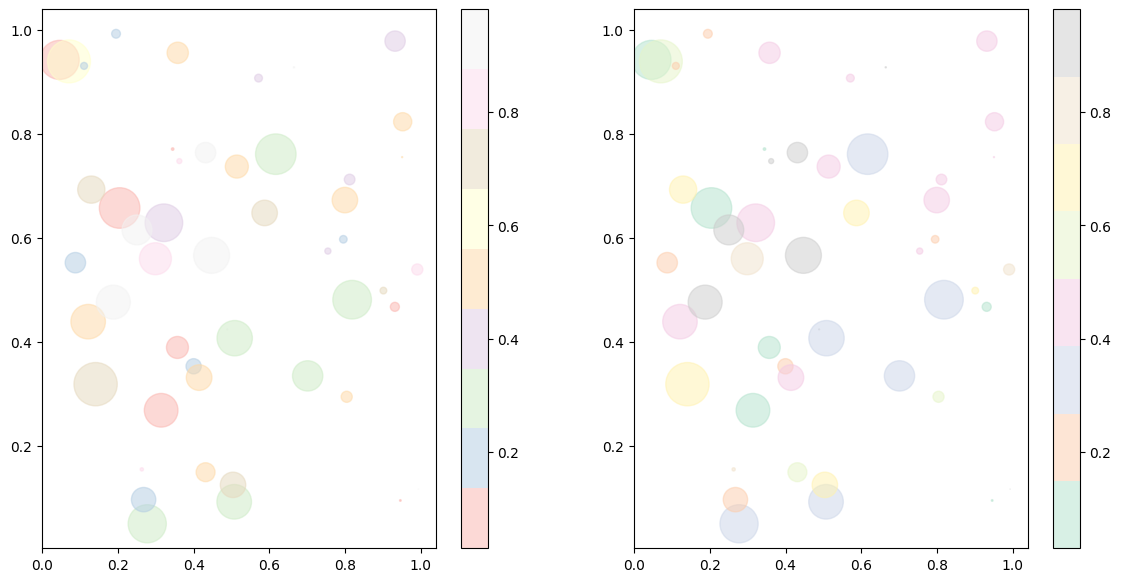

In [17]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

## Histograms

In [18]:
values = np.random.randn(1000)

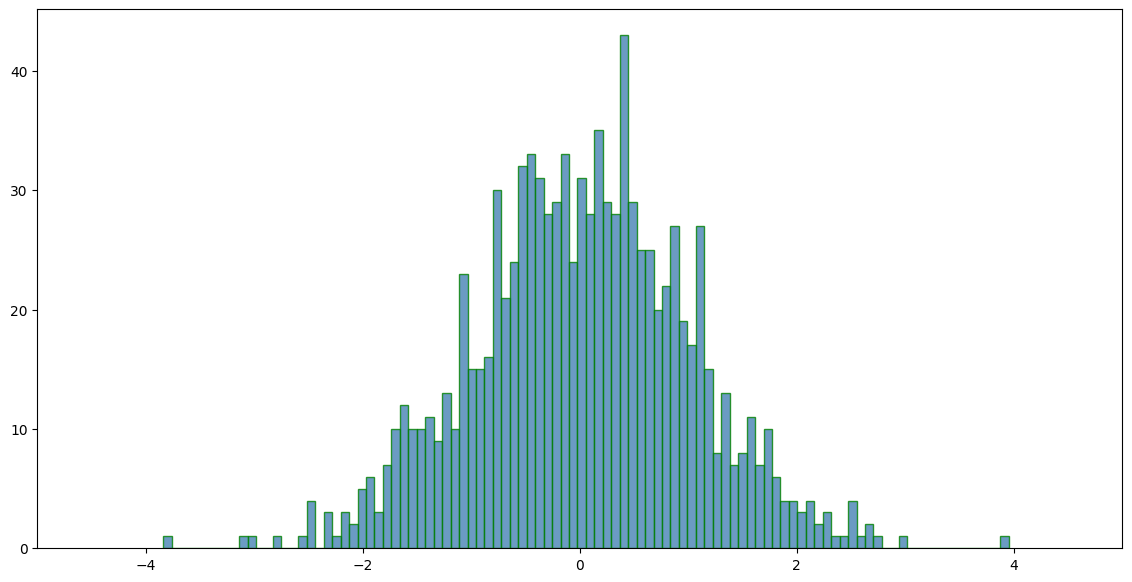

In [19]:
plt.subplots(figsize=(14,7))

plt.hist(
    values,
    bins=100,
    alpha=0.8,
    histtype='bar',
    color='steelblue',
    edgecolor='green')
plt.xlim(xmin=-5,xmax=5)
plt.show()


In [20]:
fig.savefig('hist.png')

## KDE (Kernal density estimation)

In [21]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_21232\1744215390.py:3: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(values)


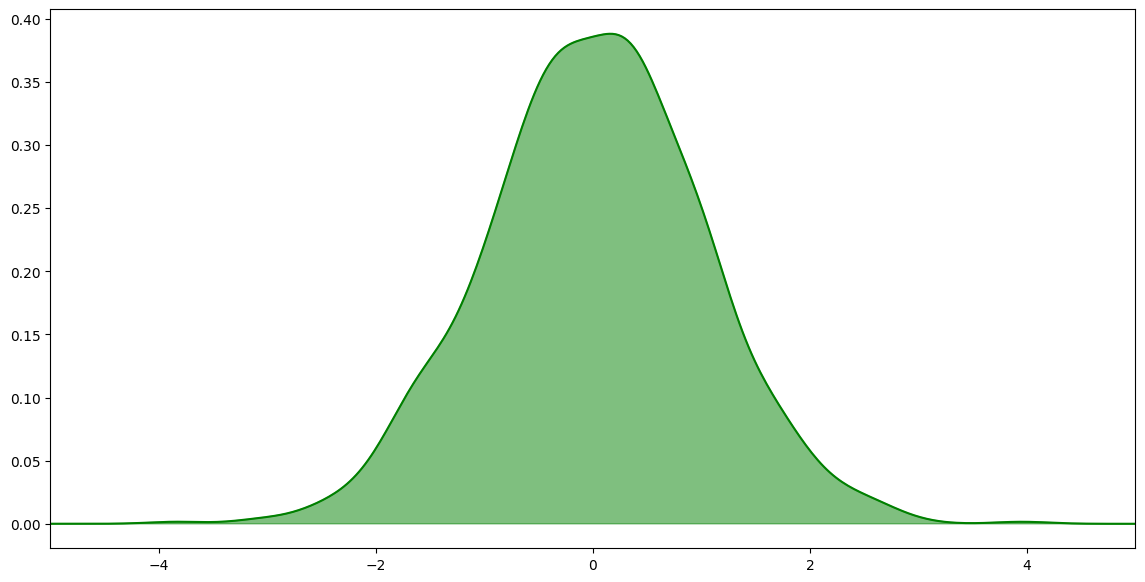

In [22]:
plt.subplots(figsize=(14,7))

values2 = np.linspace(min(values)-10,max(values)+10,1000)

plt.plot(values2,density(values2),color='green')
plt.fill_between(values2,density(values2),color='green',alpha=0.5)
plt.xlim(xmin=-5,xmax=5)
plt.show()

## Combine plots

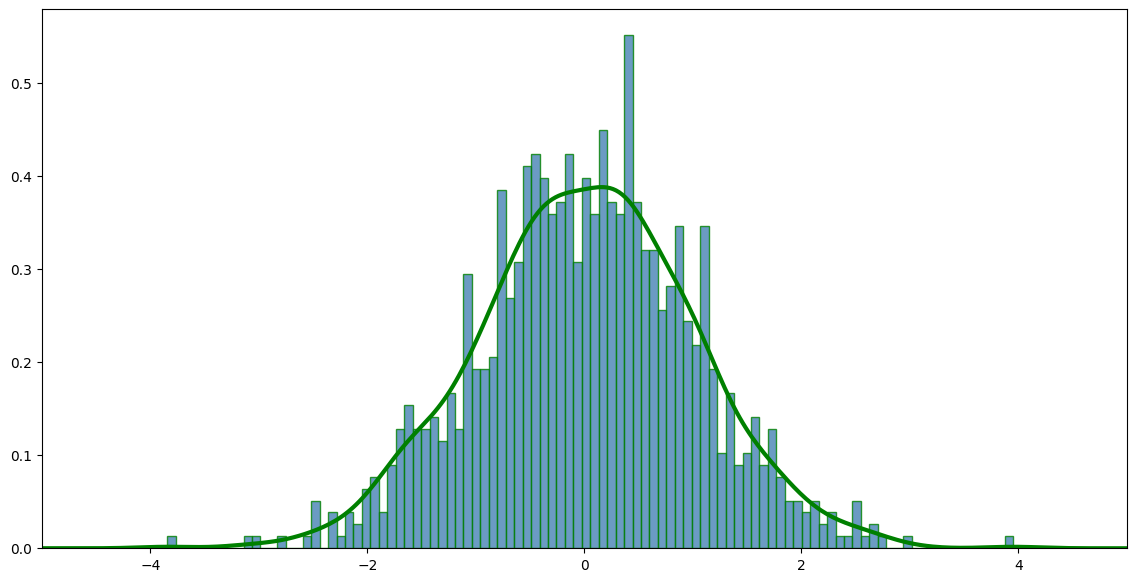

In [23]:
plt.subplots(figsize=(14,7))

plt.hist(
    values,
    bins=100,
    alpha=0.8,
    density=True,
    histtype='bar',
    color='steelblue',
    edgecolor='green')
plt.plot(values2,density(values2),color='green',linewidth=3.0)
plt.xlim(xmin=-5,xmax=5)
plt.show()

## Bar Plots

In [24]:
y = np.random.randn(1,5)[0]
y2 = np.random.randn(1,5)[0]

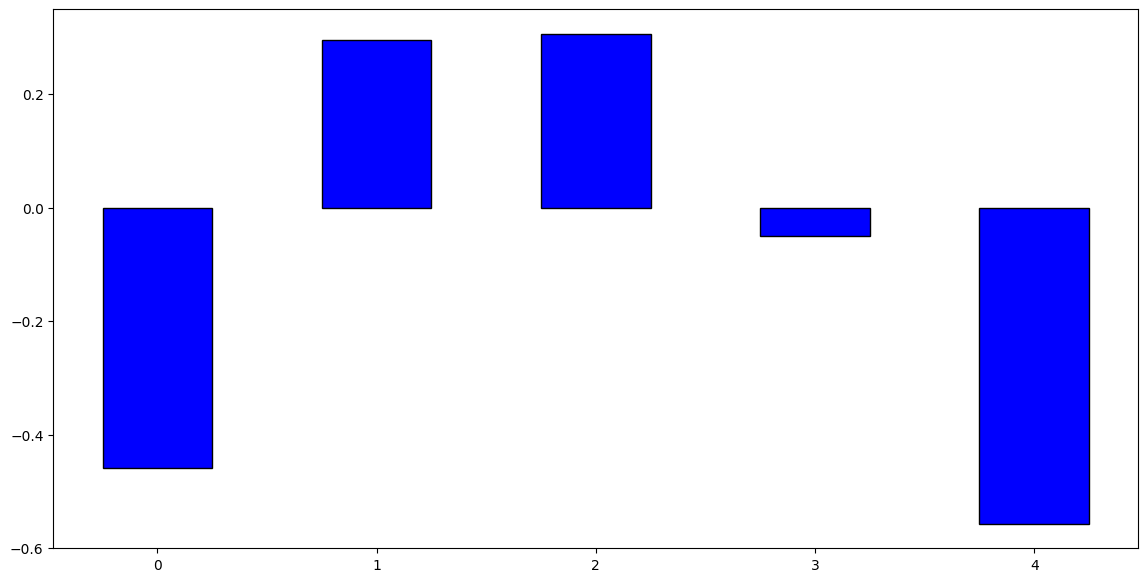

In [25]:
plt.figure(figsize=(14,7))
bar_width = 0.5
plt.bar(np.arange(len(y)), y, width=bar_width, color='blue', edgecolor='black')
plt.show()

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_21232\2859233118.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


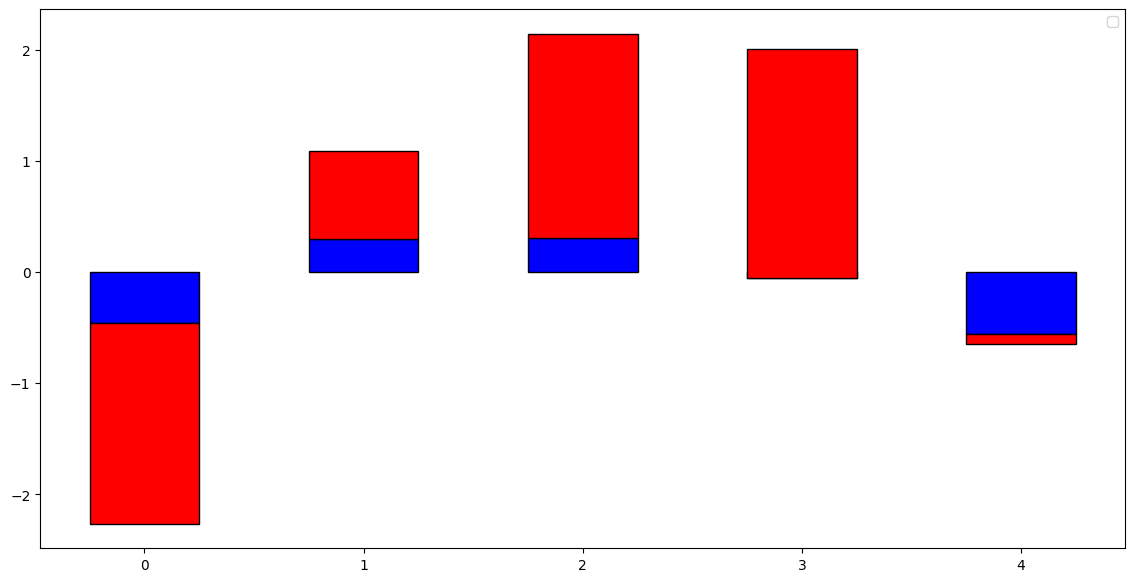

In [26]:
plt.figure(figsize=(14,7))
bar_width = 0.5
plt.bar(np.arange(len(y)), y, width=bar_width, color='blue', edgecolor='black')
plt.bar(np.arange(len(y2)), y2, width=bar_width, color='red', edgecolor='black', bottom=y)

plt.legend()
plt.show()

## BoxPlots and Outlier Detection

In [27]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, 20, 25, 30])])

(array([9., 1., 0., 1., 0., 1., 1., 0., 1., 1.]),
 array([-1.07595788,  2.03163791,  5.1392337 ,  8.24682948, 11.35442527,
        14.46202106, 17.56961685, 20.67721264, 23.78480842, 26.89240421,
        30.        ]),
 <BarContainer object of 10 artists>)

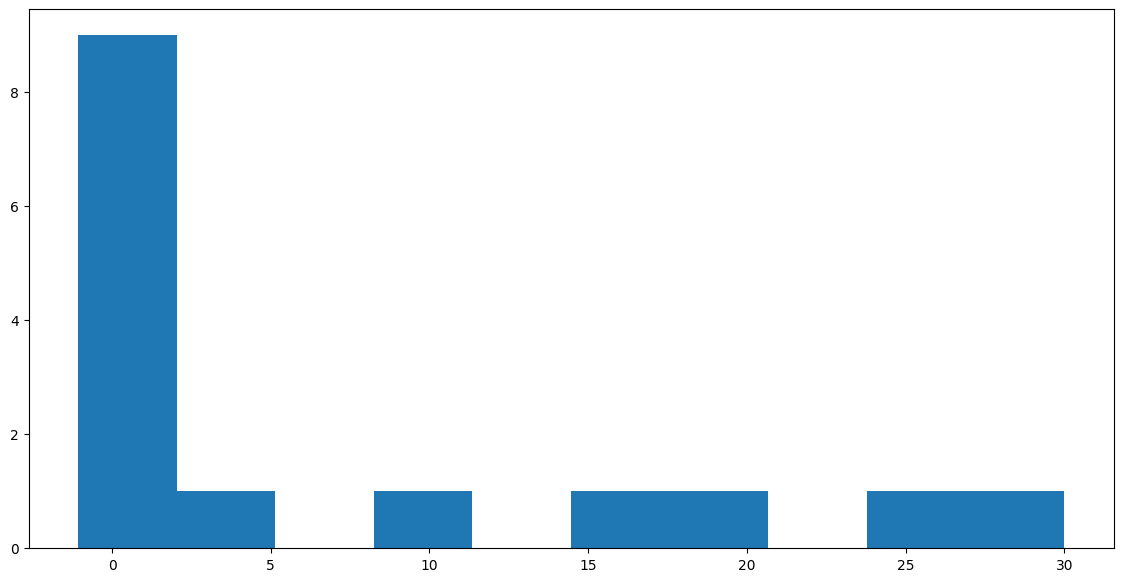

In [28]:
plt.figure(figsize=(14,7))

plt.hist(values)


{'whiskers': [<matplotlib.lines.Line2D at 0x1db63a47c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1db63a47ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db63a47b10>],
 'medians': [<matplotlib.lines.Line2D at 0x1db639b0190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db639b02d0>],
 'means': []}

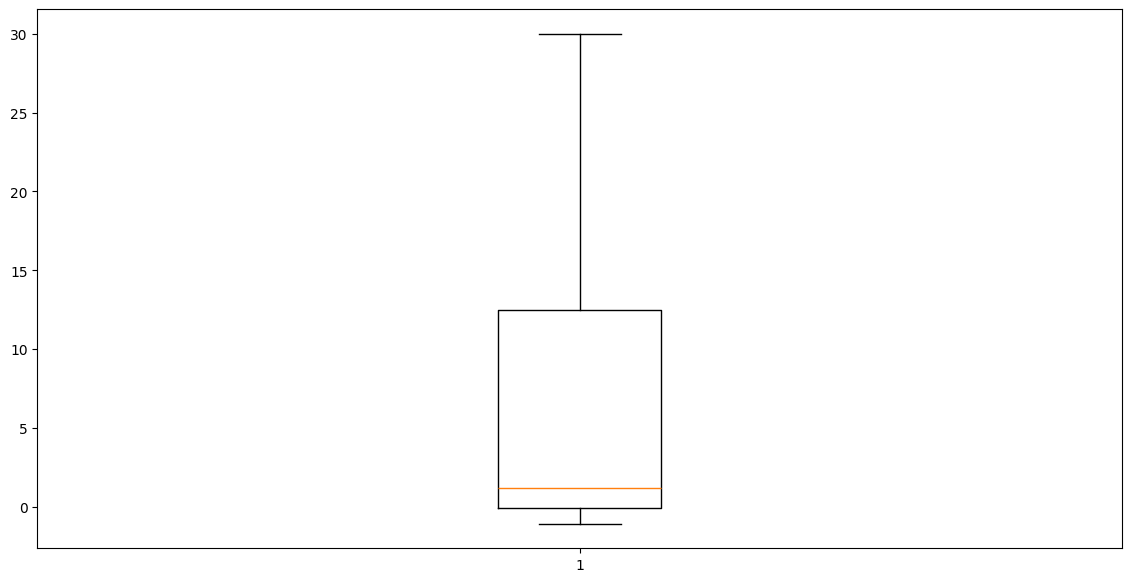

In [29]:
plt.figure(figsize=(14,7))
plt.boxplot(values)
